# Prosper Loan Data Analysis
## by Tiffany Hong



## Investigation Overview
In this reserch, I mainly investigate the relationship between salary and borrowing money. 

**Source**
Loan Data from 2005 to 2014 from Prosper*
* Prosper : peer-to-peer marketplace of lending platform in US. About 0.9 million people have gotten loan from it and the loan amount has been \$14 billion. It matches investors and borrowers.

**Import Libraries**

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Read source file
df = pd.read_csv('prosperLoanData.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.shape

(113937, 81)

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [9]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

**Changing data type of ListingCreationDate**

In [10]:
df['ListingCreationDate'] = df['ListingCreationDate'].astype('datetime64[ns]')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating 

In [12]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The loan data has 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> BorrowerState, Occupation, EmploymentStatus and Duration, IncomeRange, LoanStatus, Loan current days delinquent, Monthly Loan Payment, Percent Funded, Investors, CreditGrade

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Bar chart, Histogram, Box chart

## Univariate Exploration


**Make a copy of dataframe**

In [13]:
Loan_df = df.copy()

### 1. Comparing the borrowers number by States

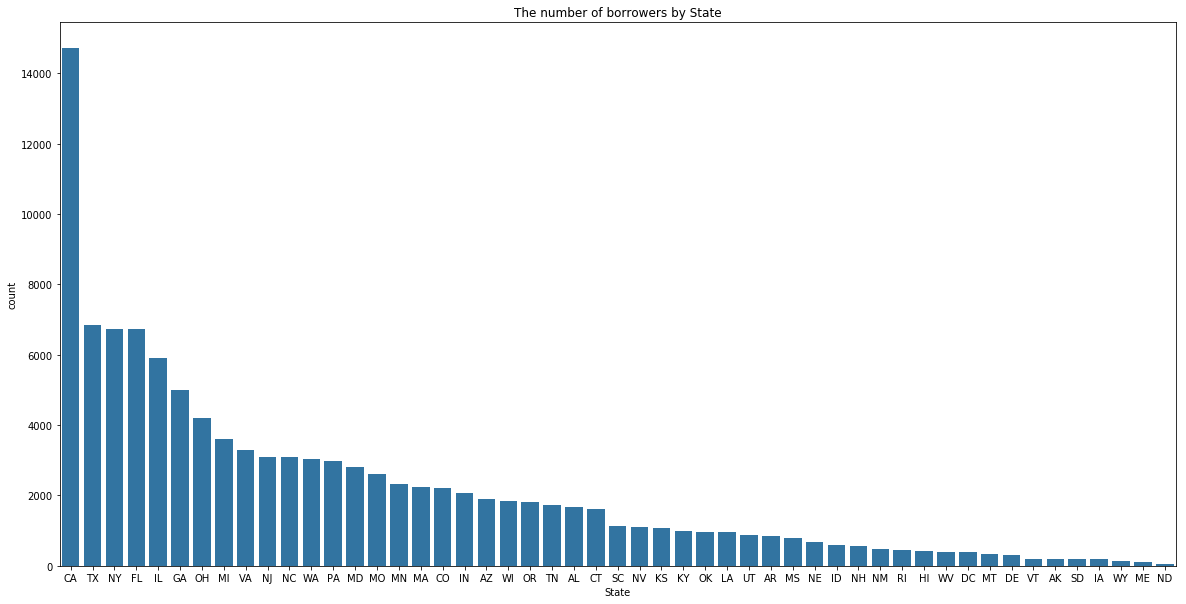

In [14]:
#Count by state
# Make a bar graph by states of borrowers
plt.figure(figsize = ([20,10]))
base_color = sb.color_palette()[0]
state_order = Loan_df['BorrowerState'].value_counts().index
sb.countplot(data = Loan_df, x = 'BorrowerState', color = base_color, order = state_order).set_title('The number of borrowers by State')
plt.xlabel('State');

CA has borrowers more than double to TX, NY, FL. Why CA has siginificantly more borrowers rather than other states? 

### 2. Why do borrowers mainly live in CA? What is their occupations?

In [15]:
Loan_CA = Loan_df[Loan_df['BorrowerState'] == "CA"]
Loan_CA.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
16,0F4835843081468212F0892,841846,2013-07-16 12:42:48.680,NaN,60,Current,NaN,0.30748,0.2809,0.2709,...,-23.01,0.00,0.00,0.00,0.0,1.0,0,0,0.0,8
25,10223590888942486E3826E,950067,2013-10-02 14:31:09.157,NaN,36,Current,NaN,0.30182,0.2629,0.2529,...,-13.11,0.00,0.00,0.00,0.0,1.0,0,0,0.0,3
30,0F57353904771934596FE9F,555213,2012-01-30 17:59:17.200,NaN,36,Completed,2012-12-19 00:00:00,0.12782,0.0999,0.0899,...,-68.22,0.00,0.00,0.00,0.0,1.0,0,0,0.0,30
62,0F183387070536545CB7D86,120164,2007-04-06 23:07:37.940,D,36,Chargedoff,2009-11-24 00:00:00,0.23748,0.2300,0.2100,...,-324.49,-523.49,8787.08,8745.06,0.0,1.0,0,0,0.0,384


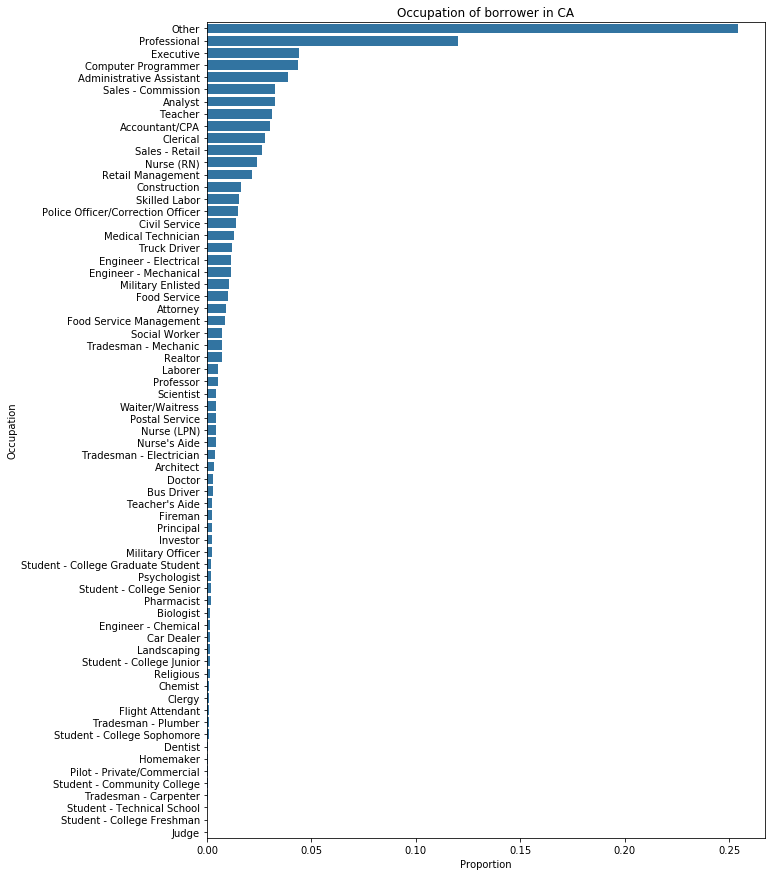

In [16]:
# Make a proportion of Occupation of borrowers in CA
n = Loan_CA.shape[0]
max_count = Loan_CA.Occupation.value_counts().max()
max_prop = max_count/n

#generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#Create Plot
plt.figure(figsize = ([10,15]))
base_color = sb.color_palette()[0]
occu_order = Loan_CA['Occupation'].value_counts().index
sb.countplot(data = Loan_CA, y = 'Occupation', color = base_color, order = occu_order).set_title('Occupation of borrower in CA')
plt.xticks(tick_props * n, tick_names)
plt.xlabel('Proportion');

Professional job is charged on most part of occupation except other selection. The high ranked jobs are tended to earn higher salary. On the other hand, the borrower who has lower salary tends to borrow money less.

### 3. The all borrowers' occupation not considering state

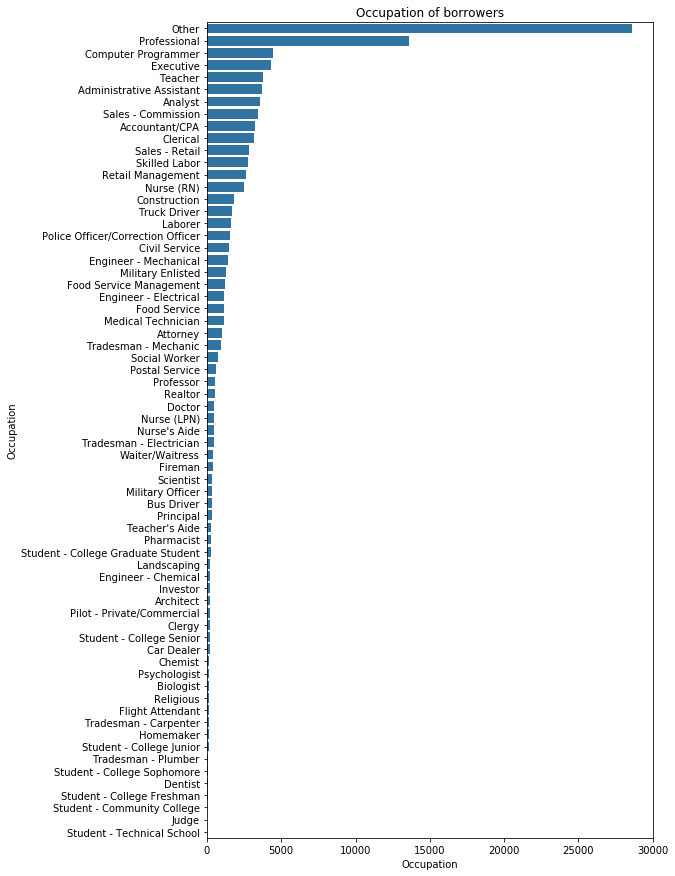

In [17]:
#Count by occupation
# Make a bar graph by occupation of borrowers
plt.figure(figsize = ([8,15]))
base_color = sb.color_palette()[0]
Occupation_order = Loan_df.Occupation.value_counts().index
sb.countplot(data = Loan_df, y = 'Occupation', color = base_color, order = Occupation_order).set_title('Occupation of borrowers')
plt.xlabel('Occupation');

Almost similar plot is created. Therefore, borrowers occupations do not depend on where they live. 

### 4. How about borrowers' Loan status?

In [18]:
sum(Loan_df.LoanStatus.isnull())

0

In [19]:
Loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

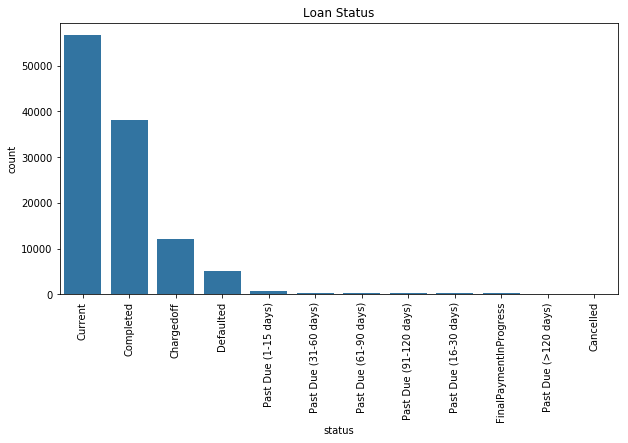

In [20]:
plt.figure(figsize = ([10,5]))
base_color = sb.color_palette()[0]
status_order = Loan_df.LoanStatus.value_counts().index
sb.countplot(data = Loan_df, x = 'LoanStatus', color = base_color, order = status_order).set_title('Loan Status')
plt.xticks(rotation = 90)
plt.xlabel('status');

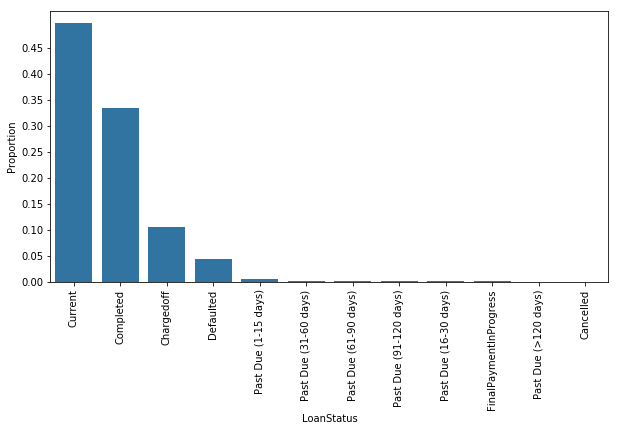

In [21]:
# Make a proportion of Occupation of borrowers in CA
n = len(Loan_df.LoanStatus)
max_count = Loan_df.LoanStatus.value_counts().max()
max_prop = max_count/n

#generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#Create Plot
plt.figure(figsize = ([10,5]))
base_color = sb.color_palette()[0]
status_order = Loan_df.LoanStatus.value_counts().index
sb.countplot(data = Loan_df, x = 'LoanStatus', color = base_color, order = status_order)
plt.xticks(rotation = 90)
plt.yticks(tick_props * n, tick_names)
plt.ylabel('Proportion');

Almost a half of borrowers are in current period. This loan system works fine financially.

## Bivariate Exploration


### 1. What is the relationship between AvailableBankcardCredit and BorrowerRate

In [22]:
sum(Loan_df.AvailableBankcardCredit.isnull())

7544

In [23]:
sum(Loan_df.AvailableBankcardCredit.value_counts())

106393

In [24]:
#clear AvailableBankcardCredit column
credit_df = Loan_df.copy()
credit_df = credit_df[pd.notnull(credit_df['AvailableBankcardCredit'])]
sum(credit_df.AvailableBankcardCredit.isna())

0

In [25]:
sum(Loan_df.BorrowerRate.isnull())

0

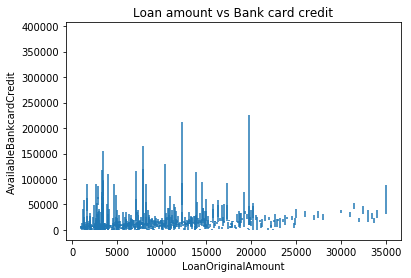

In [33]:
# set bin edges, compute centers
bin_size = 0.25
xbin_edges = np.arange(0.5, credit_df['LoanOriginalAmount'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(credit_df['LoanOriginalAmount'], xbin_edges, right = False, include_lowest = True)
y_means = credit_df['AvailableBankcardCredit'].groupby(data_xbins).mean()
y_sems = credit_df['AvailableBankcardCredit'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('AvailableBankcardCredit')
plt.title('Loan amount vs Bank card credit');

The borrowers who has bank card credit's value smaller than 100k, tends to borrow higher money rather than the borrowers who have higher bank card credit. Since they don't borrow money to anywhere, they prefer to choose this site.

### 2. How about income range effects on loan original amount?

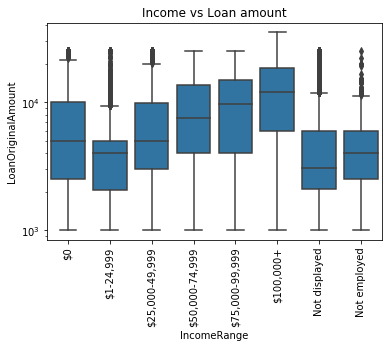

In [27]:
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Not employed']
# plots the boxplot
sb.boxplot(data=Loan_df, x='IncomeRange', y='LoanOriginalAmount', color=base_color, order = order).set_title('Income vs Loan amount');

# scale the y axis with log to analyze more accurately
plt.yscale('log')

plt.xticks(rotation=90);
plt.ylabel('LoanOriginalAmount');

This chart shows the converted result. The borrowers' median who have higher income tend to borrow more money. Therefore, bank card credit is not related to the income.

### 3.How about the trend of borrowing by year

In [28]:
# Extract year from ListingCreationDate
Loan_df['year'] = Loan_df.ListingCreationDate.dt.year
Loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,year
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013


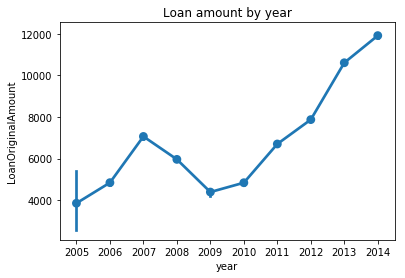

In [34]:
sb.pointplot(data =Loan_df, x = 'year', y='LoanOriginalAmount').set_title('Loan amount by year');

The borrower's original borrowing money amount has increased by year. It means the more borrowers lean to this site and try to borrow money here. In the other hand, more people tend to borrow more money by year so it can fall people at stake. 

## Multivariate Exploration



### The relationship between Loan amount and Income range by year

In [30]:
#Orders the hue
order = Loan_df.IncomeRange.value_counts().sort_index()
order

$0                  621
$1-24,999          7274
$100,000+         17337
$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
Not displayed      7741
Not employed        806
Name: IncomeRange, dtype: int64

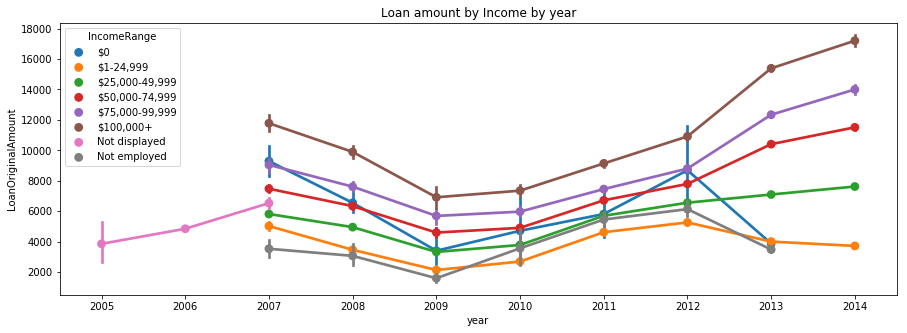

In [31]:
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Not employed']
# plots the boxplot to analyze homeowner's and non-homeowner's rate over years
g = sb.pointplot(data= Loan_df, x='year', y='LoanOriginalAmount', hue='IncomeRange', hue_order = order).set_title('Loan amount by Income by year');
g.figure.set_figwidth(15)
g.figure.set_figheight(5)

Since 'Not displayed' income range disappears after 2007, I just count on the result after 2007. As I searched above, loan amount has increased by year. Borrowing money amount has increased in the higher salary since 2009. Especially, the amount has increased dramatically since 2012. Thus, recently higher incomers want to borrow more money comparing to the borrower earning below \$50k.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!